# Machine Learning Lab _4 
<hr/>

Submitted by <br>
Name: **Stebin George** <br>
Register Number: **21122061** <br>
Class: **2MSCDS** <br> 
Time_Taken : __5 hrs__
<hr/>

## Lab Overview  
### Objectives

Perform Classification using Decision Trees.
Demonstrate Multiple Datasets, do the necessary EDA and show various evaluation metrics.

### Sections
__1. Introduction__

__2. Libraries__

__3.EDA__

__4.Classifier__

__5.Evaluation Metrics__

__6.Conclusion__

### Problem Definition

1. This lab tries to better familiarize one with the DescisionTree algorithm in ML.
2. Getting familiarization with the dataset using the various plots.
3. Finding the methods of decision classifier and applying it in a real dataset.
4. Testing the accuracy of the generated model with some random dataset.
5. creating user defined dataframes from given dataset.
6. usage of various evaluation metrics to find out the performance of the dataset.

### Approach

1. Import the necessary libraries 
2. Import the daatset from sklearn.datasets
3. Do some basic Operations to get a picture about the daatset. 
4. Usage of histogram,kdeplot and other visualization tools to do the EDA part.
5. usage of Classsifier functions in the sklearn..
6. Evaluating the efficiency of the matrix using the metrics under sklearn.

### References

https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b
https://www.tutorialspoint.com/scikit_learn/index.htm#:~:text=Scikit%2Dlearn%20(Sklearn)%20is,a%20consistence%20interface%20in%20Python.
https://www.analyticsvidhya.com/blog/2015/01/scikit-learn-python-machine-learning-tool/

## Introduction:

**Decision trees are a popular supervised learning method for a variety of reasons. Benefits of decision trees include that they can be used for both regression and classification, they are easy to interpret and they don’t require feature scaling. They have several flaws including being prone to overfitting.**

### Loading the necessary datasets:

**The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.**

In [55]:
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import  model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import tree


### Loading the datasets:

In [2]:
df1=load_iris(as_frame=True)
df=df1.data
df['target']=df1.target
df['species'] = df1['target'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


### Cleaning the datasets:

In [3]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [4]:
display(df.isna().any())

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
species              False
dtype: bool

**The above results shows that there are no null values in the dataset**

In [5]:
df.duplicated().value_counts()


False    149
True       1
dtype: int64

In [6]:
duplicate=df[df.duplicated()]
duplicate

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
142,5.8,2.7,5.1,1.9,2,virginica


**The above result shows the duplicated value in the dataset**

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

### Exploratory Data Analysis:

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**The above mentioned code gives the overall summary of the dataset:**

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

**Gives the list of columns in the above dataframe**

#### Correlation:


In [10]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### Heat-Map:


<AxesSubplot:>

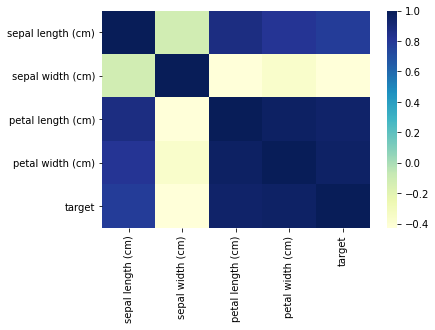

In [11]:
sns.heatmap(df.corr(),cmap="YlGnBu")

**From the heatmap it can be concluded that the petal-length and petal-width are strongly correlated.**

### Histogram distribution:

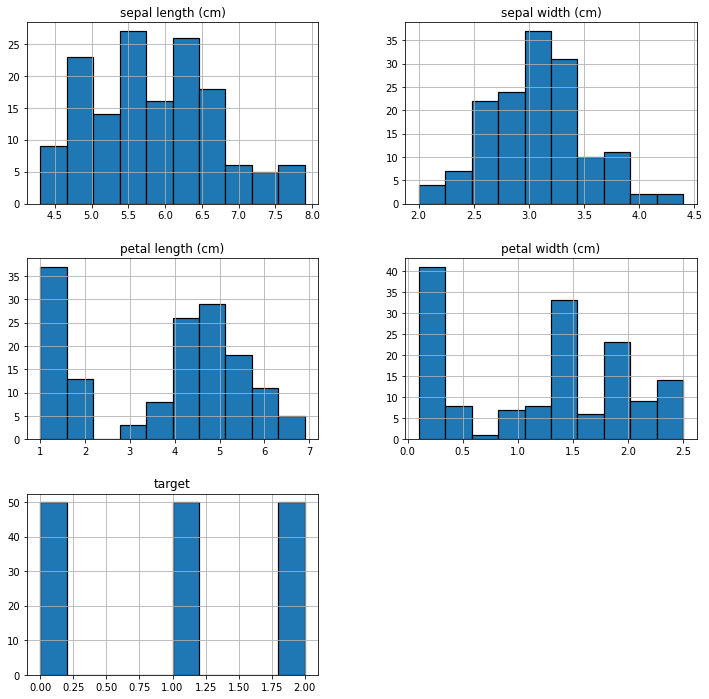

In [12]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

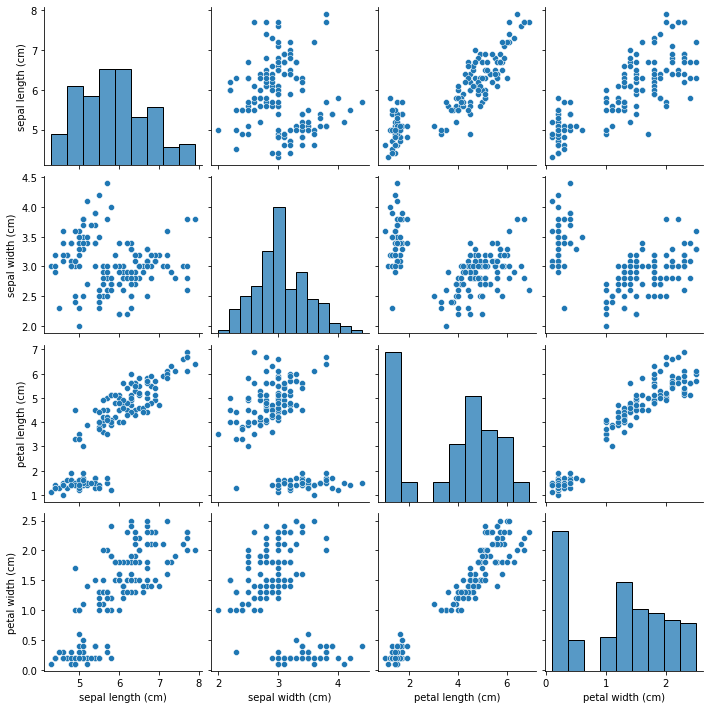

In [13]:
sns.pairplot(df.iloc[:,:4])

###  Scatter-Plot:

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

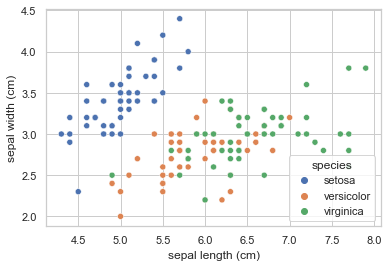

In [14]:
sns.set(style='whitegrid')
sns.scatterplot(data=df,x="sepal length (cm)",y="sepal width (cm)",hue="species",palette="deep")

**Scatter-plot representing the sepal length vs width distribution of datas in different species.**

### Box-Plot:

<AxesSubplot:xlabel='species', ylabel='petal width (cm)'>

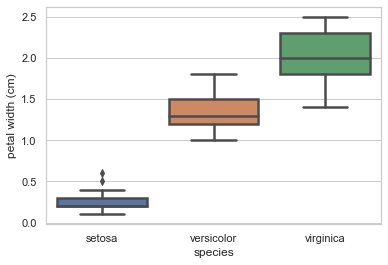

In [15]:
sns.set(style='whitegrid')
sns.boxplot(x='species',y='petal width (cm)',data=df,linewidth=2.5)

**The graph above describes the petal length of the various species.**

### Kde plot: 

C:\Users\stebi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\stebi\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\stebi\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

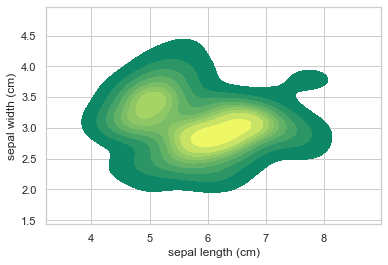

In [16]:

# Plotting the KDE Plot
iris_virginica = df.query("species=='virginica'")
sns.kdeplot(df['sepal length (cm)'],
df['sepal width (cm)'],
color='b', shade=True, Label='Virginica',
cmap="summer", shade_lowest=False)

### Joint-Plot:

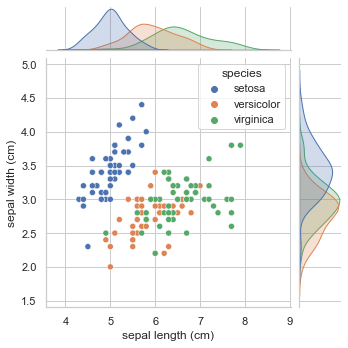

In [17]:
sns.jointplot(x='sepal length (cm)',y='sepal width (cm)',data=df,height=5,hue='species')

## Classification Trees:

**Classification is a type of supervised machine learning problem where the target (response) variable is categorical. Given the training data, which contains the known label, the classifier approximates a mapping function (f) from the input variables (X) to output variables (Y).**

### Splitting Data into Training and Test Sets @ 80% training:

In [18]:
# test_size: what proportion of original data is used for test set
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(df.iloc[:,:4], df['target'],train_size=.8, random_state=0)

#### Make an instance of the Model:

In [19]:
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)

#### Training the model on the data, storing the information learned from the data

In [20]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### Predict the labels of new data (new flowers)

In [21]:
clf.predict(X_test.iloc[1].values.reshape(1, -1))

array([1])

#### Predict for Multiple Observations (images) at Once

In [22]:
y_pred=clf.predict(X_test[0:10])
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

### Comapring the model performance at various Train-test ratios and random states:

In [23]:
train_ratio=[.5,.6,.7,.8]
random=[1,2,3]
ran=[]
train=[]
sco=[]
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
for i in train_ratio:
    for j in random:
        ran.append(j)
        train.append(i)
        X_train, X_test, Y_train, Y_test =model_selection.train_test_split(df.iloc[:,:4], df['target'], random_state=j)
        clf.fit(X_train, Y_train)
        clf.predict(X_test)
        score = clf.score(X_test, Y_test)
        y_pred=clf.predict(X_test)
        sco.append(score)


In [24]:
train = [x * 100 for x in train]

In [25]:
df_1=pd.DataFrame({'train_size (%)':train,'random_state':ran, 'Acccuracy':sco})
df_1

,train_size (%),random_state,Acccuracy
0,50.0,1,0.973684
1,50.0,2,0.973684
2,50.0,3,0.973684
3,60.0,1,0.973684
4,60.0,2,0.973684
5,60.0,3,0.973684
6,70.0,1,0.973684
7,70.0,2,0.973684
8,70.0,3,0.973684
9,80.0,1,0.973684


**The maximum accuracy obtained is about .973684**

### MAX_DEPTH VS ACCURACY 

In [26]:
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

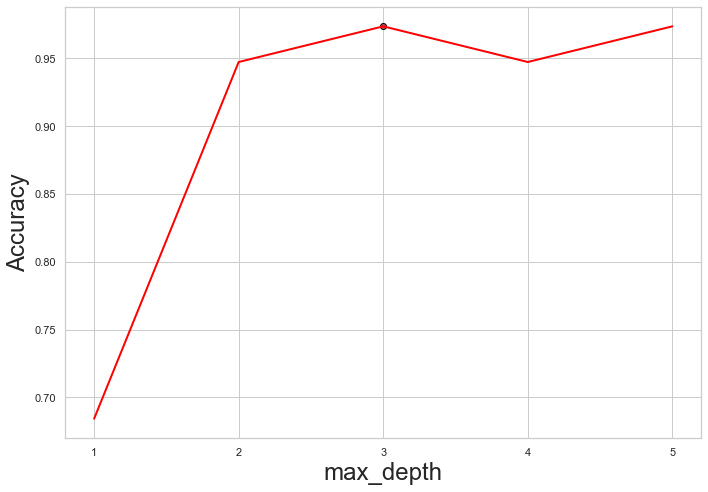

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7))
ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='red')
s = ax.scatter(max_depth_range[2],
           accuracy[2],
           color = 'r')
s.set_edgecolor( 'black' )
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()


**For the max_depth of 3 we get the maximum accuracy**

### Measuring Model Performance:

### Accuracy
**Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.**

### Confusion Matrix
**Confusion Matrix is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values.**

**A confusion matrix is defined as thetable that is often used to describe the performance of a classification model on a set of the test data for which the true values are known.**

**True Positive:** We predicted positive and it’s true. In the image, we predicted that a woman is pregnant and she actually is.

**True Negative:** We predicted negative and it’s true. In the image, we predicted that a man is not pregnant and he actually is not.

**False Positive (Type 1 Error)-** We predicted positive and it’s false. In the image, we predicted that a man is pregnant but he actually is not.

**False Negative (Type 2 Error)-** We predicted negative and it’s false. In the image, we predicted that a woman is not pregnant but she actually is.

### Precision 
**Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives. The importance of Precision is in music or video recommendation systems, e-commerce websites, etc. where wrong results could lead to customer churn and this could be harmful to the business**

### Recall (Sensitivity)
**Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive. It is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected.**


### F1 Score
**It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall.**

### AUC-ROC 
**The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’.**

### Log Loss 
**Log loss (Logistic loss) or Cross-Entropy Loss is one of the major metrics to assess the performance of a classification problem.**

### Classification Reports:

In [28]:
print(metrics.classification_report(Y_test,y_pred,zero_division=False))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



**The classification report visualizerdisplays the precision, recall, F1, and support scores for the model.**

### Confusion Matrix:

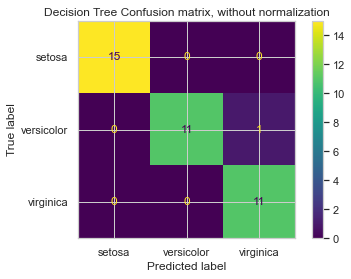

In [29]:
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=df1.target_names)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');
plt.show()

### Extracting the Important Features:

In [30]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.913
2,petal length (cm),0.063
1,sepal width (cm),0.018
0,sepal length (cm),0.007


**From the output and based on the indices of the four features, we know that the first two features (sepal measurements) are of no importance, and only the petal ones are used to build this tree.**

### Plot_tree: 

**We can visualize the classification rules through plot_tree used in the DecisionTree**

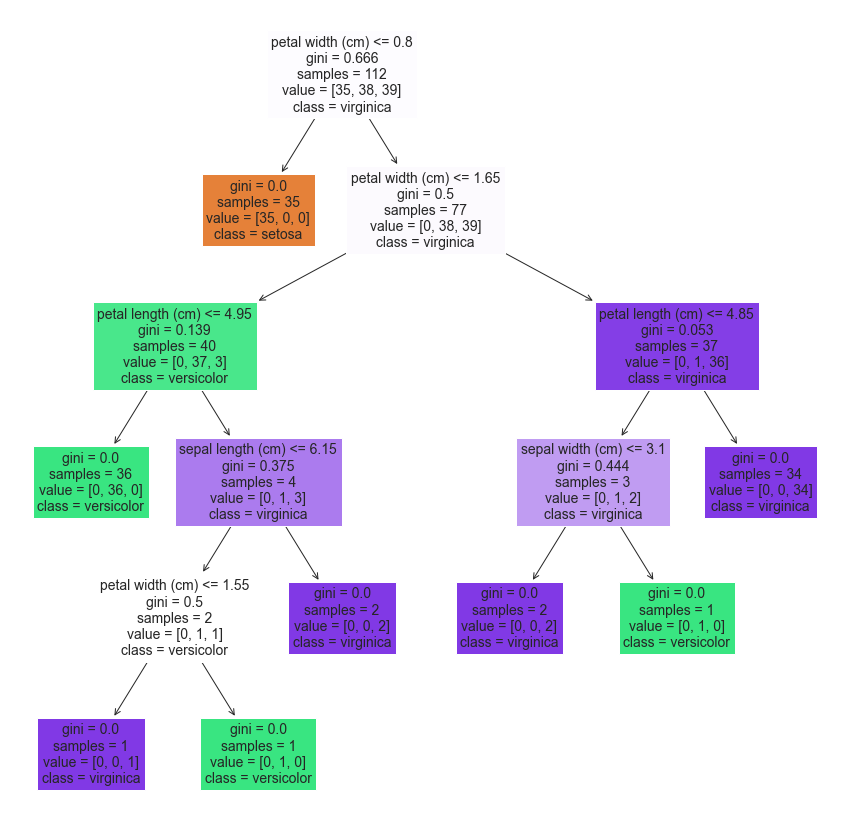

In [31]:
plt.figure(figsize = (15,15))
plot_tree(clf, feature_names = df1.feature_names, class_names = df1.target_names, filled = True)
plt.show()

### Dataset 2 (Red wine quality)


This dataset is the red wine quality dataset. The quality of the wine is tested using some features
like fixed acidity, volatile acidity, amount of citric acid present etc.. and the quality is
predicted.The dataset contains 1599 rows and 12 columns(11 features and 1 target).

In [32]:
data=pd.read_csv(r"C:\Users\stebi\Downloads\winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
#there are 1599 rows and 12 columns in the dataset
data.shape 

(1599, 12)

In [34]:
#gives the names of the columns in the dataframe
pd.DataFrame(data.columns)

,0
0,fixed acidity
1,volatile acidity
2,citric acid
3,residual sugar
4,chlorides
5,free sulfur dioxide
6,total sulfur dioxide
7,density
8,pH
9,sulphates


In [35]:
data.describe().T #gives the statistical calculations

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [36]:
#checks for any null values in the dataset
data.isnull().any()


fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [37]:
#Gives the correlation matrix
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


###  Visualizations

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

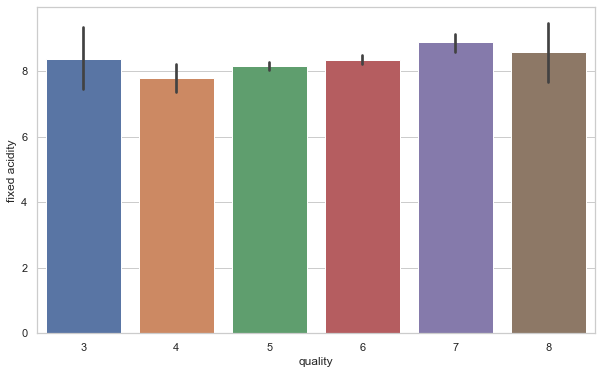

In [38]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y ="fixed acidity", data = data)


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

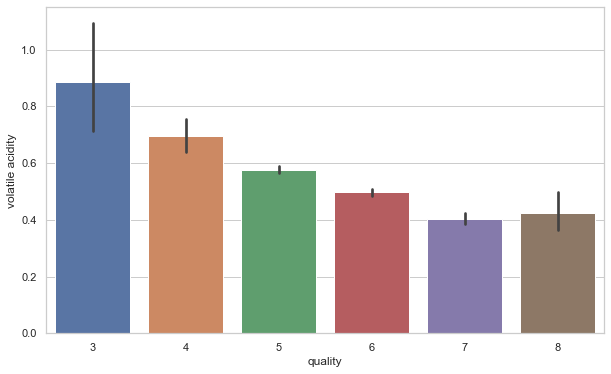

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y ="volatile acidity", data = data)


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

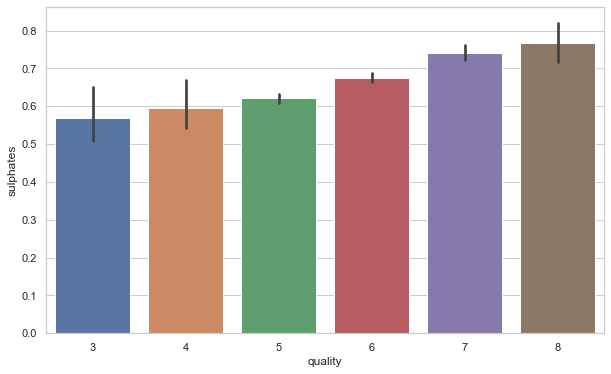

In [40]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y ="sulphates", data = data)


### Modeling

In [41]:
scaler = StandardScaler() #used to scale the dataset in such a way that the data is fit between the min $ max values

In [42]:
d = scaler.fit_transform(data)
pd.DataFrame(d)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [43]:
X = data.iloc[:,:11] #dividing into features and target
y = data['quality']

### Splitting into training and testing:

In [44]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X, y, test_size = 0.20, random_state=3)

In [45]:
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is: ", y_train.shape)
print("The shape of y_test is: ", y_test.shape)


The shape of X_train is:  (1279, 11)
The shape of X_test is:  (320, 11)
The shape of y_train is:  (1279,)
The shape of y_test is:  (320,)


In [46]:
model = DecisionTreeClassifier() #model fittin

In [47]:
model.fit(X_train,y_train)
y_prediction = model.predict(X_test)
prediction = pd.DataFrame({'Actual Quality':y_test, 'Predicted Quality': y_prediction})
prediction

,Actual Quality,Predicted Quality
147,5,5
937,4,6
877,6,6
1000,7,6
73,4,5
...,...,...
841,5,5
889,5,6
1145,6,7
1476,5,5


In [48]:
print("The accuracy of the model is: ",metrics.accuracy_score(y_test,y_prediction))


The accuracy of the model is:  0.640625


In [49]:
print("The classification report is: ")
print(metrics.classification_report(y_test, y_prediction))

The classification report is: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.17      0.20        12
           5       0.68      0.74      0.71       138
           6       0.67      0.60      0.63       131
           7       0.55      0.61      0.58        36
           8       0.00      0.00      0.00         1

    accuracy                           0.64       320
   macro avg       0.36      0.35      0.35       320
weighted avg       0.64      0.64      0.64       320



The confusion matrix is given by: 
[[  0   0   2   0   0   0]
 [  0   2   7   2   1   0]
 [  1   5 102  29   1   0]
 [  0   1  35  79  15   1]
 [  0   0   4   8  22   2]
 [  0   0   0   0   1   0]]


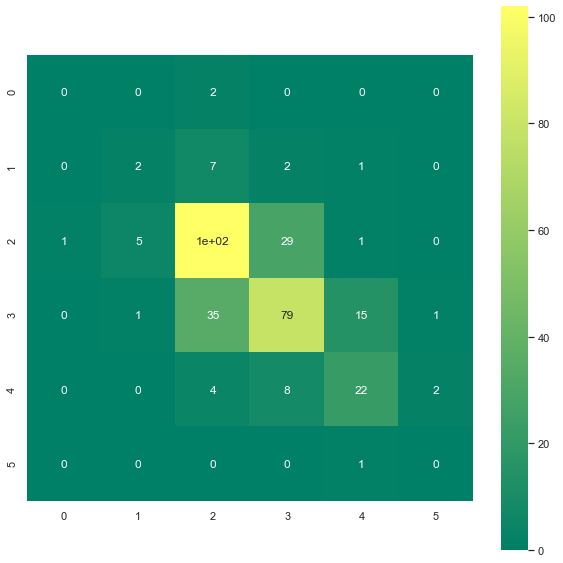

In [50]:
fig = plt.figure(figsize = (10,10))
print("The confusion matrix is given by: ")
matrix = metrics.confusion_matrix(y_test, y_prediction)
print(matrix)
sns.heatmap(matrix, square = True, annot = True, cmap = "summer")
plt.show()

In [58]:
train_ratio=[.5,.6,.7,.8]
random=[1,2,3]
ran=[]
train=[]
sco=[]
clf = DecisionTreeClassifier()
for i in train_ratio:
    for j in random:
        ran.append(j)
        train.append(i)
        X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,y, random_state=j)
        clf.fit(X_train, Y_train)
        clf.predict(X_test)
        score = clf.score(X_test, Y_test)
        y_pred=clf.predict(X_test)
        sco.append(score)


In [59]:
df_1=pd.DataFrame({'train_size (%)':train,'random_state':ran, 'Acccuracy':sco})
df_1

,train_size (%),random_state,Acccuracy
0,0.5,1,0.5950
1,0.5,2,0.5725
2,0.5,3,0.6325
3,0.6,1,0.5975
4,0.6,2,0.5650
5,0.6,3,0.6275
6,0.7,1,0.5825
7,0.7,2,0.5625
8,0.7,3,0.6525
9,0.8,1,0.5800


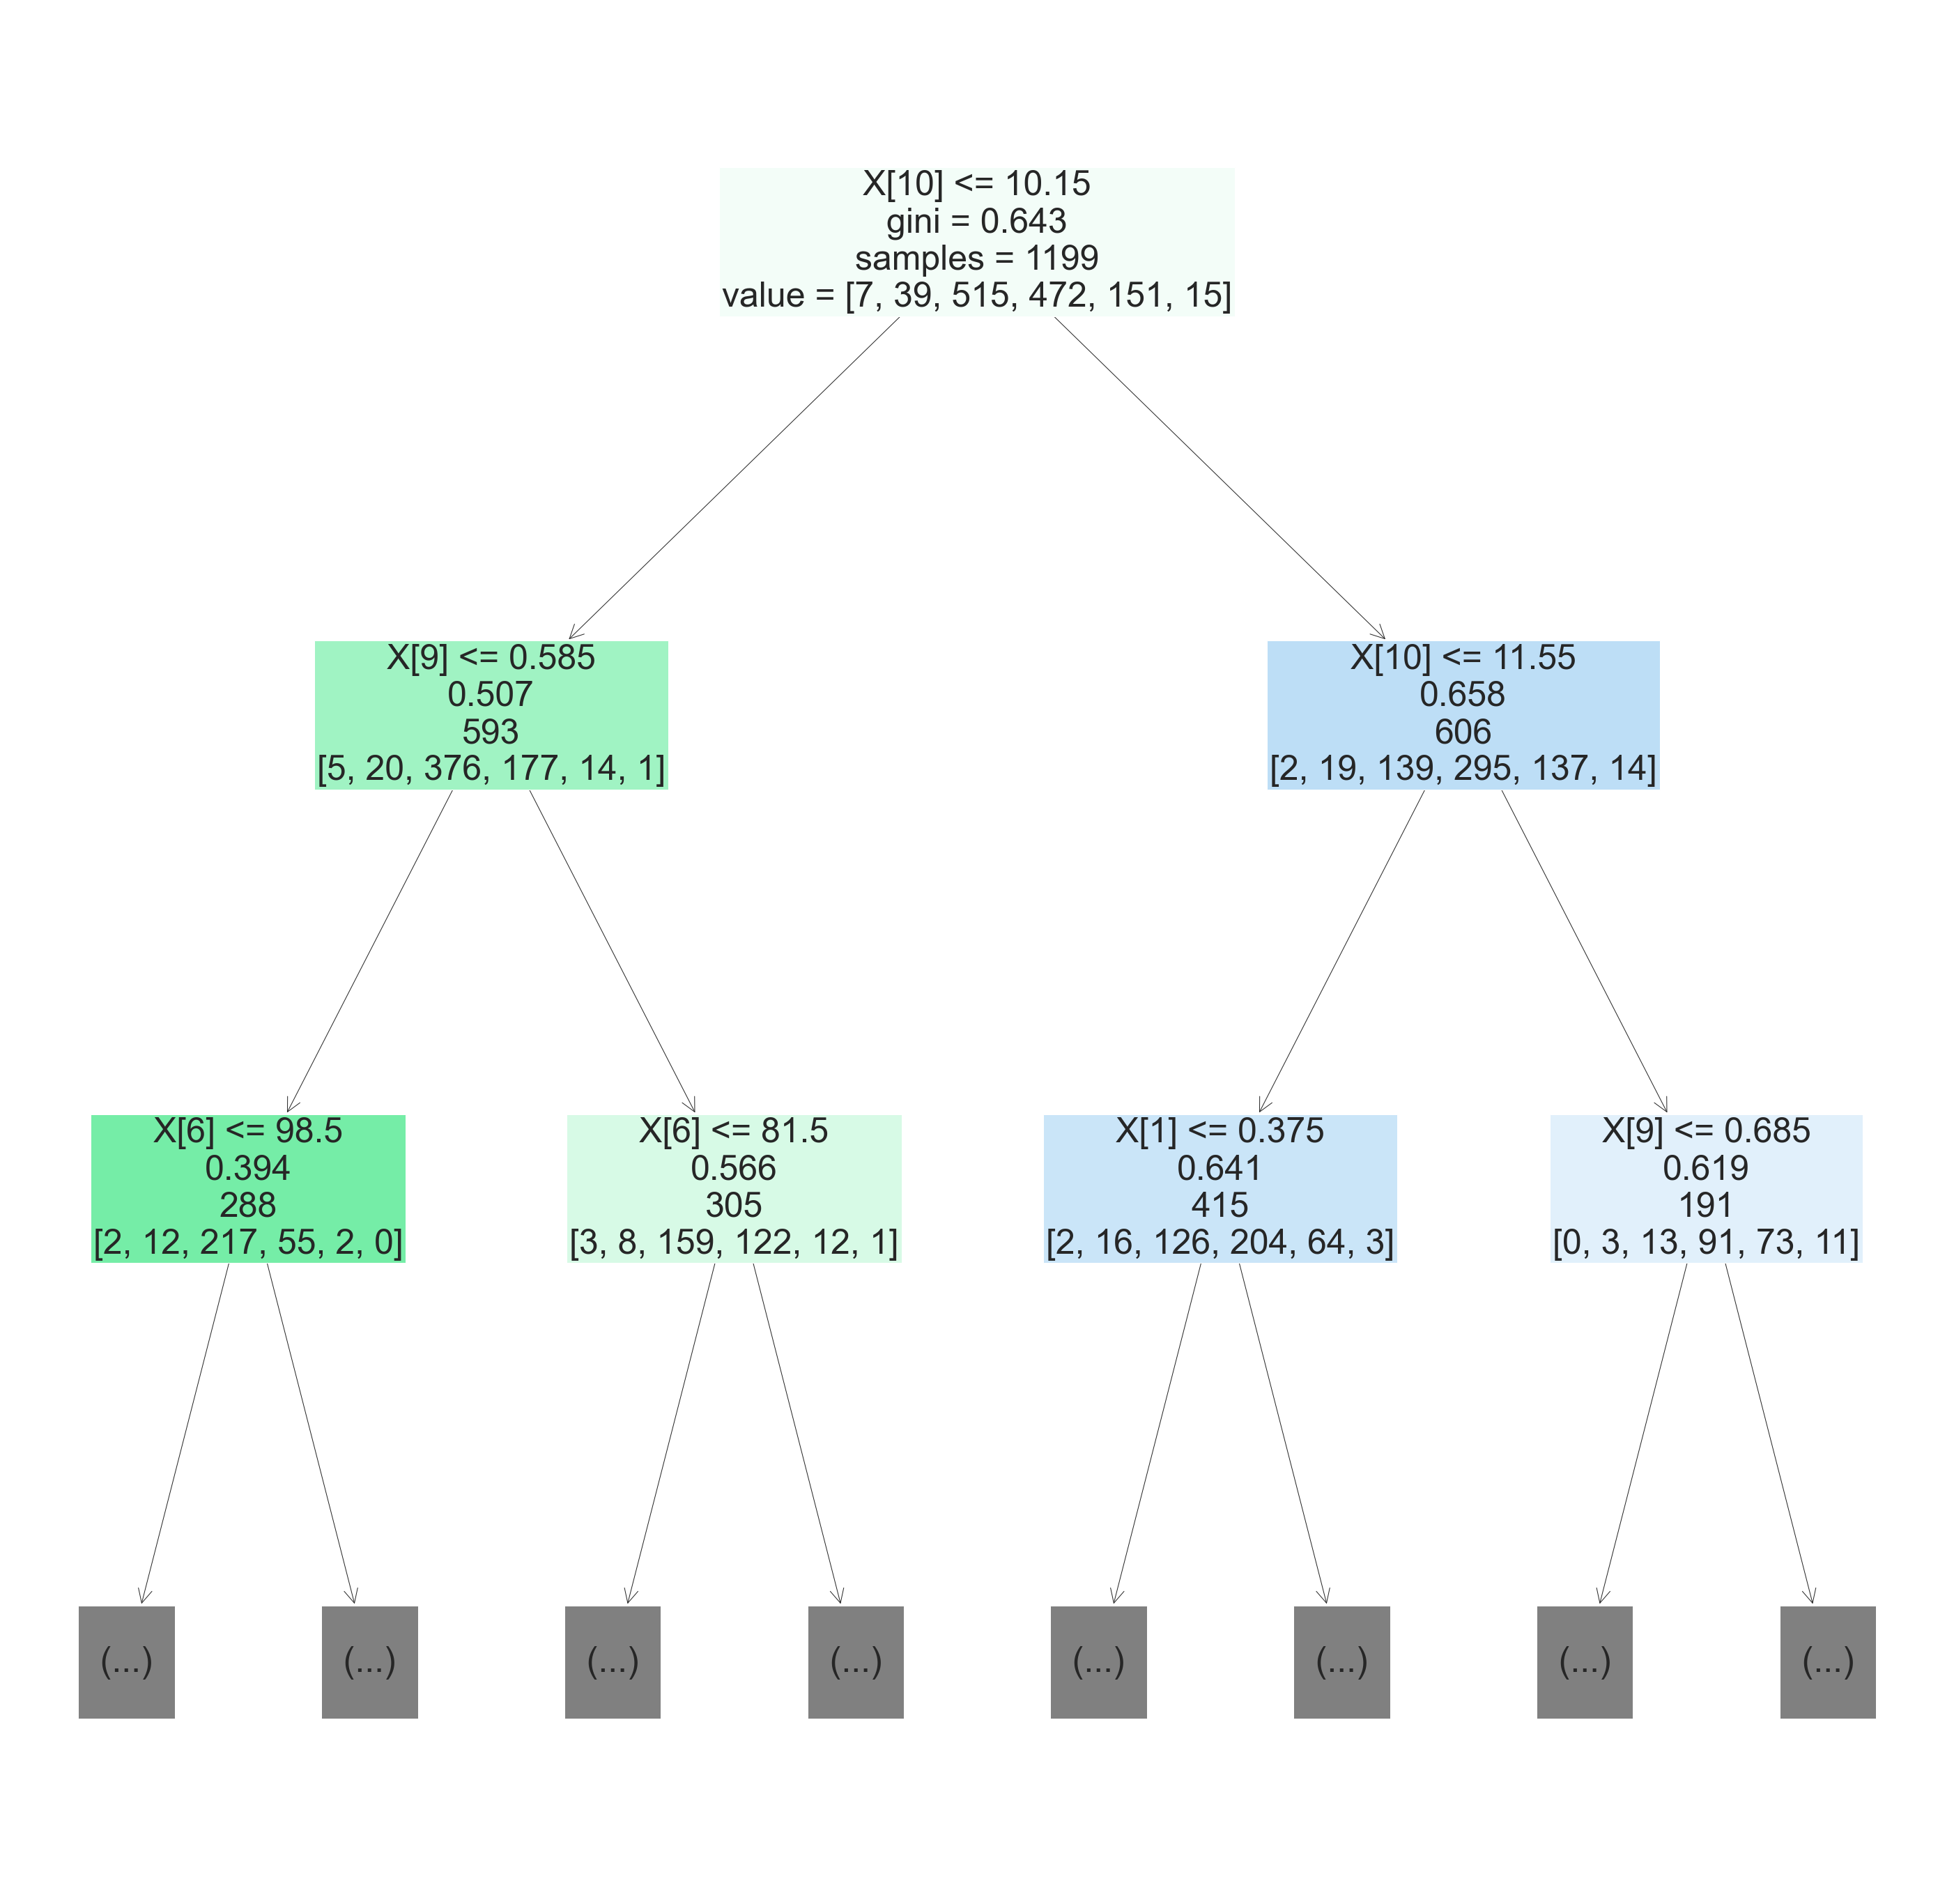

In [64]:
dtree=tree.DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
y_pred=dtree.predict(X_test)

plt.figure(figsize=(50,50))
tree.plot_tree(dtree,max_depth=2,label = 'root',fontsize = 50, filled=True)
plt.show()


### Conclusion:

**Through this lab the basic function of the decision classifier is classifier is shown.**